# Import and prepare the data

In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
from sklearn.datasets import load_iris

In [3]:
dataset = load_iris

In [6]:
from prepare_utils import data_preprocess
X_train, X_test, y_train, y_test, num_features = data_preprocess(dataset)

load_iris preprocessed


# Experience 1

In [7]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

# Initialize the feature map for encoding classical data into quantum states.
feature_map = ZZFeatureMap(feature_dimension=num_features,
                           reps=1,                    # Number of repetitions for encoding
                           entanglement="linear")     # Entanglement strategy (linear connectivity)

# Define the sampler, which evaluates the quantum circuits.
sampler = Sampler()

# Compute fidelities between quantum states using the sampler.
fidelity = ComputeUncompute(sampler=sampler)

# Create a quantum kernel for use in machine learning algorithms.
kernel = FidelityQuantumKernel(fidelity=fidelity,
                               feature_map=feature_map)

In [8]:
from qiskit_machine_learning.algorithms import QSVC

qsvc_full = QSVC(quantum_kernel = kernel)
qsvc_full.fit(X_train, y_train)

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x0000020FDB684460>,
     random_state=None, shrinking=True, tol=0.001, verbose=False)

In [9]:
from evaluation_utils import generate_classification_report

qsvc_zz_linear = generate_classification_report(qsvc_full, X_test, y_test, model_name="QSVC-ZZFeatureMap-linear")
qsvc_zz_linear

,precision,recall,f1-score,support,Model
0,1.0,1.0,1.0,10.0,QSVC-ZZFeatureMap-linear
1,1.0,1.0,1.0,10.0,QSVC-ZZFeatureMap-linear
2,1.0,1.0,1.0,10.0,QSVC-ZZFeatureMap-linear
accuracy,1.0,1.0,1.0,1.0,QSVC-ZZFeatureMap-linear
macro avg,1.0,1.0,1.0,30.0,QSVC-ZZFeatureMap-linear
weighted avg,1.0,1.0,1.0,30.0,QSVC-ZZFeatureMap-linear


# Experience 2

In [10]:
# Initialize the feature map
feature_map = ZZFeatureMap(feature_dimension = num_features,
                           reps = 1,
                           entanglement = "circular")

# Define the sampler
sampler = Sampler()

# Compute fidelities
fidelity = ComputeUncompute(sampler=sampler)

# Create a quantum kernel
kernel = FidelityQuantumKernel(fidelity=fidelity,
                               feature_map=feature_map)

In [11]:
qsvc_full = QSVC(quantum_kernel = kernel)
qsvc_full.fit(X_train, y_train)

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x0000020FE6262040>,
     random_state=None, shrinking=True, tol=0.001, verbose=False)

In [12]:
qsvc_zz_circular = generate_classification_report(qsvc_full, X_test, y_test, model_name="QSVC-ZZFeatureMap-circular")
qsvc_zz_circular

,precision,recall,f1-score,support,Model
0,1.000000,1.000000,1.000000,10.000000,QSVC-ZZFeatureMap-circular
1,1.000000,0.800000,0.888889,10.000000,QSVC-ZZFeatureMap-circular
2,0.833333,1.000000,0.909091,10.000000,QSVC-ZZFeatureMap-circular
accuracy,0.933333,0.933333,0.933333,0.933333,QSVC-ZZFeatureMap-circular
macro avg,0.944444,0.933333,0.932660,30.000000,QSVC-ZZFeatureMap-circular
weighted avg,0.944444,0.933333,0.932660,30.000000,QSVC-ZZFeatureMap-circular


# Experience 3

In [13]:
# Initialize the feature map
feature_map = ZZFeatureMap(feature_dimension = num_features,
                           reps = 1,
                           entanglement = "full")

# Define the sampler
sampler = Sampler()

# Compute fidelities
fidelity = ComputeUncompute(sampler=sampler)

# Create a quantum kernel
kernel = FidelityQuantumKernel(fidelity=fidelity,
                               feature_map=feature_map)

In [14]:
qsvc_full = QSVC(quantum_kernel = kernel)
qsvc_full.fit(X_train, y_train)

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x0000020FECCDC1F0>,
     random_state=None, shrinking=True, tol=0.001, verbose=False)

In [15]:
qsvc_zz_full = generate_classification_report(qsvc_full, X_test, y_test, model_name="QSVC-ZZFeatureMap-full")
qsvc_zz_full

,precision,recall,f1-score,support,Model
0,1.0,1.0,1.0,10.0,QSVC-ZZFeatureMap-full
1,1.0,1.0,1.0,10.0,QSVC-ZZFeatureMap-full
2,1.0,1.0,1.0,10.0,QSVC-ZZFeatureMap-full
accuracy,1.0,1.0,1.0,1.0,QSVC-ZZFeatureMap-full
macro avg,1.0,1.0,1.0,30.0,QSVC-ZZFeatureMap-full
weighted avg,1.0,1.0,1.0,30.0,QSVC-ZZFeatureMap-full


# Results

In [21]:
import pandas as pd
qsvc_zz_linear['Entanglement Type'] = 'linear'
qsvc_zz_circular['Entanglement Type'] = 'circular'
qsvc_zz_full['Entanglement Type'] = 'full'

In [23]:
combined_report = pd.concat([qsvc_zz_linear, qsvc_zz_circular, qsvc_zz_full], ignore_index=True)

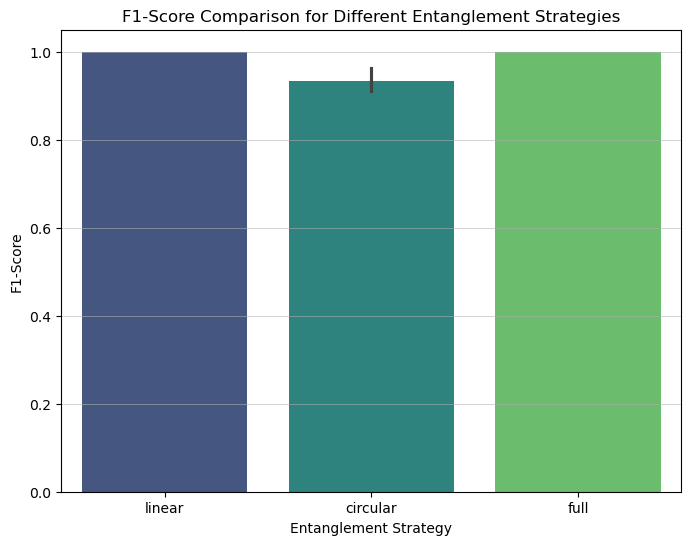

In [36]:
# Plotting the F1-scores for different entanglement strategies
plt.figure(figsize=(8, 6))

# Use seaborn to plot the F1-score, grouped by entanglement type
ax = sns.barplot(x="Entanglement Type", y="f1-score", data=combined_report, palette='viridis')

# Adding labels and title
plt.xlabel('Entanglement Strategy')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison for Different Entanglement Strategies')
plt.grid(axis='y', linewidth=0.4)

# Show the plot
plt.show()